In [1]:
from datetime import datetime
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from eigsep_data import S11

In [2]:
data_dir = Path("/home/christian/Documents/research/eigsep/data-analysis/data/deployment4/s11_data/")
files = [f for f in data_dir.iterdir() if f.name.startswith("ant")]

In [3]:
def lin2dB(arr):
    return 20*np.log10(np.abs(arr)) 

In [4]:
s11 = [S11(f) for f in files]
time_ix = np.argsort([s.timestamp for s in s11])
s11 = np.array(s11)[time_ix]

## Lift - Saturday July 19

Lift are the first 13 files, taken at 5 minute cadence. First two measurements were made while still on the ground.

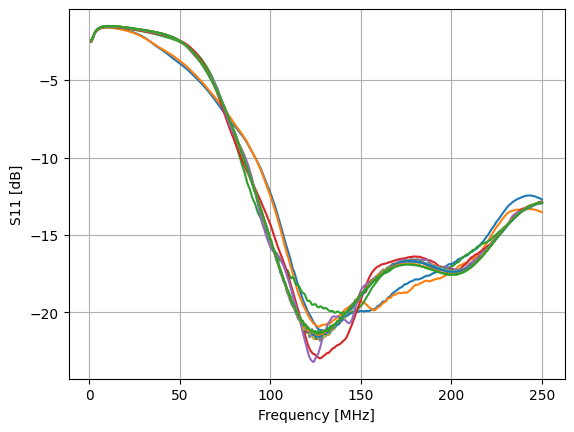

In [5]:
lift_s11 = s11[:13]

plt.figure()
for s in lift_s11:
    plt.plot(s.freqs, lin2dB(s.s11_cal["ant"]))
plt.xlabel("Frequency [MHz]")
plt.ylabel("S11 [dB]")
# plt.legend()
plt.grid()
plt.show()

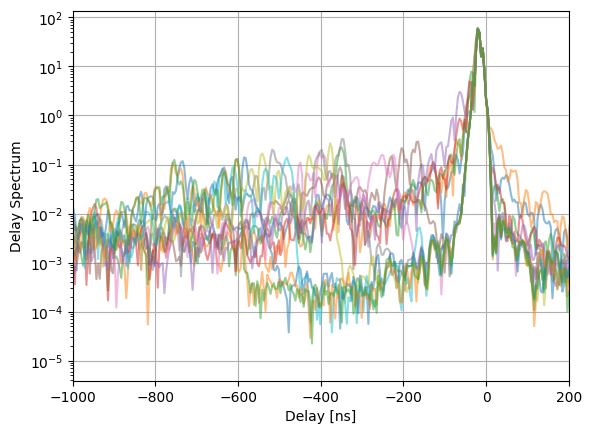

In [6]:
# delay

plt.figure()
for s in lift_s11:
    plt.plot(np.fft.fftshift(s.dlys), np.fft.fftshift(s.s11_dly["ant"]), alpha=0.5)
plt.yscale("log")
plt.xlabel("Delay [ns]")
plt.ylabel("Delay Spectrum")
plt.xlim(-1000, 200)
# plt.legend()
plt.grid()
plt.show()

## Rotations, July 20

At full height, did 8 measurements from 1-500 MHz. Elevation 0, 90, 180, 270 deg (0 being up), and azimuth 0 deg (aligned with kevlar) and 90 deg.

In [16]:
def get_orientation_imu(metadata, key="panda"):
    """
    Parameters
    ----------
    key : str
        panda or ant
    
    """
    imu = metadata[f"imu_{key}"]
    g0 = np.array([0, 0, -1])
    grav = np.array(3, dtype=float)
    for i, d in enumerate(["x", "y", "z"]):
        grav[i] = imu[f"accel_{d}"] - imu[f"lin_accel_{d}"]
    grav /= np.linalg.norm(grav)
    th = np.arccos(g0 @ grav)
    return th

def get_orientation(metadata):
    """"
    Use motor steps to get orientation.

    Returns
    -------
    float
        Azimuth position in deg
    float
        Elevation position in deg
    
    """
    mot = metadata["motor"]
    return mot
    #return mot["az_pos"], mot["el_pos"]

In [22]:
s11[-1].meta["imu_panda"]

{'sensor_name': 'imu_panda',
 'status': 'update',
 'app_id': 3,
 'quat_i': -0.668701172,
 'quat_j': 0.205627441,
 'quat_k': 0.675964355,
 'quat_real': 0.231689453,
 'accel_x': -9.7265625,
 'accel_y': -0.26953125,
 'accel_z': -0.015625,
 'lin_accel_x': 0.01953125,
 'lin_accel_y': -0.03515625,
 'lin_accel_z': 0.125,
 'gyro_x': 0,
 'gyro_y': -0.001953125,
 'gyro_z': 0,
 'mag_x': 32.625,
 'mag_y': -28.6875,
 'mag_z': 15.5,
 'calibrated': 'False',
 'accel_cal': 2,
 'mag_cal': 1}

In [18]:
len(s11)

54

In [ ]:
a

In [21]:
print([s.meta == s11[-1].meta for s in s11])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]


(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
4 2025-07-20 09:11:11
(0, 0)
5 2025-07-20 09:14:55
(0, 0)
(0, 0)


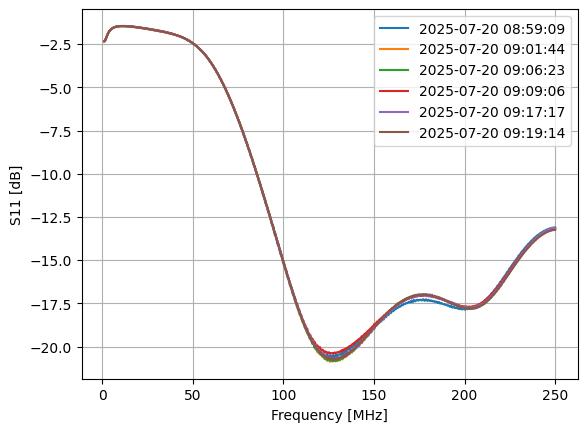

In [13]:
rot_s11 = s11[33:41]

plt.figure()
for ix, s in enumerate(rot_s11):
    print(get_orientation(s.meta))
    if np.min(lin2dB(s.s11_cal["ant"])) < -40:
        print(ix, s.time)
        continue
    plt.plot(s.freqs, lin2dB(s.s11_cal["ant"]), label=s.time)
plt.xlabel("Frequency [MHz]")
plt.ylabel("S11 [dB]")
plt.legend()
plt.grid()
plt.show()